In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nyt1 = pd.read_csv("http://stat.columbia.edu/~rachel/datasets/nyt1.csv")

In [3]:
nyt1.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [4]:
type(nyt1['Age'][0])

numpy.int64

In [5]:
nyt1['agecut'] = pd.cut(nyt1['Age'], [-np.inf, 0, 18, 24, 34, 44, 54, 64, np.inf]).astype('str')

In [6]:
nyt1['agecut'].head()

0    (34.0, 44.0]
1     (64.0, inf]
2    (24.0, 34.0]
3    (44.0, 54.0]
4    (44.0, 54.0]
Name: agecut, dtype: object

In [7]:
nyt1.describe(include='all')

,Age,Gender,Impressions,Clicks,Signed_In,agecut
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000,458441
unique,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,NaN,NaN,NaN,"(-inf, 0.0]"
freq,NaN,NaN,NaN,NaN,NaN,137106
mean,29.482551,0.367037,5.007316,0.092594,0.700930,NaN
std,23.607034,0.481997,2.239349,0.309973,0.457851,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,3.000000,0.000000,0.000000,NaN
50%,31.000000,0.000000,5.000000,0.000000,1.000000,NaN
75%,48.000000,1.000000,6.000000,0.000000,1.000000,NaN


In [8]:
nyt1.groupby(by='agecut')['Age'].agg([len, np.min, np.mean, np.max])

,len,amin,mean,amax
agecut,,,,
"(-inf, 0.0]",137106,0,0.000000,0
"(0.0, 18.0]",19252,7,16.033503,18
"(18.0, 24.0]",35270,19,21.269039,24
"(24.0, 34.0]",58174,25,29.503352,34
"(34.0, 44.0]",70860,35,39.494680,44
"(44.0, 54.0]",64288,45,49.492580,54
"(54.0, 64.0]",44738,55,59.498189,64
"(64.0, inf]",28753,65,72.988697,108


In [9]:
nyt1.groupby(by='agecut').agg([len, np.min, np.mean, np.max])

Age                       Gender                      \
                 len amin       mean amax     len amin      mean amax   
agecut                                                                  
(-inf, 0.0]   137106    0   0.000000    0  137106    0  0.000000    0   
(0.0, 18.0]    19252    7  16.033503   18   19252    0  0.642115    1   
(18.0, 24.0]   35270   19  21.269039   24   35270    0  0.533853    1   
(24.0, 34.0]   58174   25  29.503352   34   58174    0  0.532162    1   
(34.0, 44.0]   70860   35  39.494680   44   70860    0  0.531696    1   
(44.0, 54.0]   64288   45  49.492580   54   64288    0  0.528979    1   
(54.0, 64.0]   44738   55  59.498189   64   44738    0  0.536188    1   
(64.0, inf]    28753   65  72.988697  108   28753    0  0.363266    1   

             Impressions                      Clicks                      \
                     len amin      mean amax     len amin      mean amax   
agecut                                                                     
(-inf, 0.0]       137106    0  4.999657   18  137106    0  0.142080    4   
(0.0, 18.0]        19252    0  4.998961   17   19252    0  0.131051    3   
(18.0, 24.0]       35270    0  5.006635   17   35270    0  0.048455    2   
(24.0, 34.0]       58174    0  4.993829   17   58174    0  0.050486    2   
(34.0, 44.0]       70860    0  5.021507   20   70860    0  0.051679    3   
(44.0, 54.0]       64288    0  5.010406   17   64288    0  0.050274    2   
(54.0, 64.0]       44738    0  5.022308   16   44738    0  0.101837    3   
(64.0, inf]        28753    0  5.012347   16   28753    0  0.151289    3   

             Signed_In                 
                   len amin mean amax  
agecut                                 
(-inf, 0.0]     137106    0    0    0  
(0.0, 18.0]      19252    1    1    1  
(18.0, 24.0]     35270    1    1    1  
(24.0, 34.0]     58174    1    1    1  
(34.0, 44.0]     70860    1    1    1  
(44.0, 54.0]     64288    1    1    1  
(54.0, 64.0]     44738    1    1    1  
(64.0, inf]      28753    1    1    1

In [12]:
nyt1['Impressions'].describe()

count    458441.000000
mean          5.007316
std           2.239349
min           0.000000
25%           3.000000
50%           5.000000
75%           6.000000
max          20.000000
Name: Impressions, dtype: float64

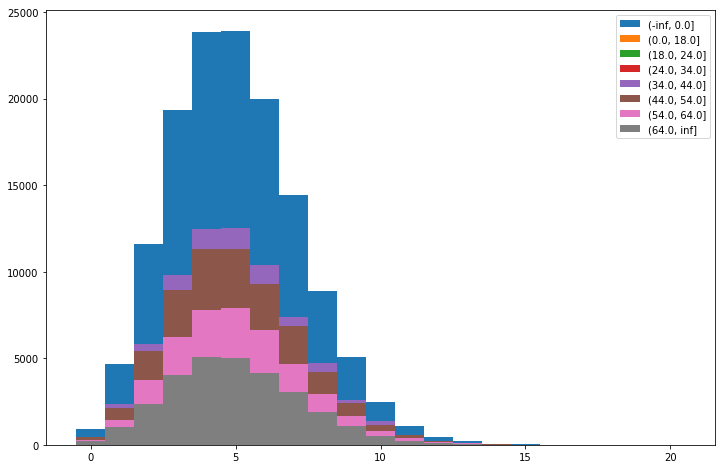

In [48]:
plt.figure(figsize=(12, 8))Impressions
for name, group in nyt1.groupby(by='agecut'):
    group['Impressions'].hist(bins=np.arange(0, 22)-0.5, grid=False, label=name)
plt.legend()

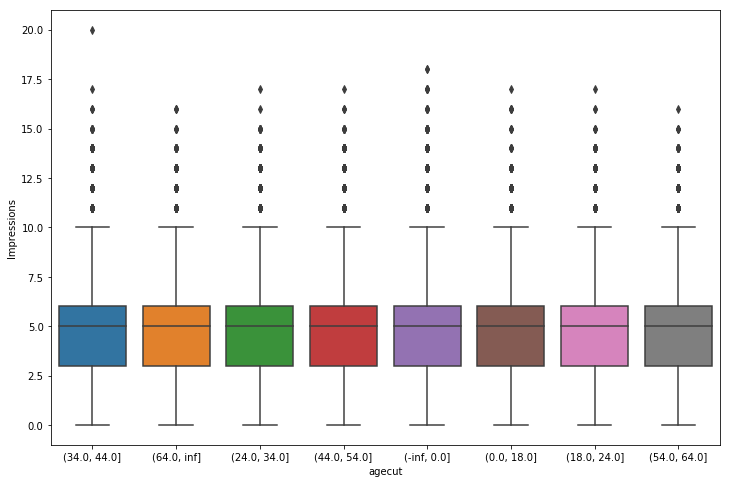

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot('agecut', 'Impressions', data=nyt1)